In [1]:
from warnings import catch_warnings

import pandas as pd
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
tf.config.threading.set_intra_op_parallelism_threads(4)
tf.config.threading.set_inter_op_parallelism_threads(4)

In [3]:
def load_images_from_folder(folder_path, img_size=(48, 48)):
    """
    Loads images from a folder, preprocesses them:
    - Converts to grayscale
    - Resizes to specified dimensions
    - Normalizes pixel values to [0, 1]

    Skips invalid or unreadable files.

    Args:
        folder_path (str): Path to the folder containing images
        img_size (tuple): Target size for resizing (width, height)

    Returns:
        np.array: Array of preprocessed images with shape (num_samples, img_size[0], img_size[1])
    """
    processed = []

    if not os.path.exists(folder_path):
        print(f"⚠️ Folder does not exist: {folder_path}")
        return np.array(processed)

    max_images=1_000

    for filename in os.listdir(folder_path):
        if max_images == 0:
            break
        max_images-=1
        img_path = os.path.join(folder_path, filename)

        # Load image
        img = cv2.imread(img_path)

        if img is None:
            print(f"❌ Failed to load image: {img_path}")
            continue

        try:
            # # Convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize image
            resized = cv2.resize(img, img_size, interpolation=cv2.INTER_AREA)

            # Normalize pixel values to [0, 1]
            normalized = resized.astype('float32') / 255.0

            # Add to list
            processed.append(normalized)

        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
            continue

    return np.array(processed)

In [4]:
def combine_arrays(*arrays):
    return np.concatenate([arr for arr in arrays if len(arr) > 0])

In [5]:
directories = [
    r'merge\Apple__black_rot',
    r'merge\Apple__healthy',
    r'merge\Apple__rust',
    r'merge\Apple__scab',
    r'merge\Cassava__bacterial_blight',
    r'merge\Cassava__brown_streak_disease',
    r'merge\Cassava__green_mottle',
    r'merge\Cassava__healthy',
    r'merge\Cassava__mosaic_disease',
    r'merge\Cherry__healthy',
    r'merge\Cherry__powdery_mildew',
    r'merge\Chili__healthy',
    r'merge\Chili__leaf curl',
    r'merge\Chili__leaf spot',
    r'merge\Chili__whitefly',
    r'merge\Chili__yellowish',
    r'merge\Coffee__cercospora_leaf_spot',
    r'merge\Coffee__healthy',
    r'merge\Coffee__red_spider_mite',
    r'merge\Coffee__rust',
    r'merge\Corn__common_rust',
    r'merge\Corn__gray_leaf_spot',
    r'merge\Corn__healthy',
    r'merge\Corn__northern_leaf_blight',
    r'merge\Cucumber__diseased',
    r'merge\Cucumber__healthy',
    r'merge\Gauva__diseased',
    r'merge\Gauva__healthy',
    r'merge\Grape__black_measles',
    r'merge\Grape__black_rot',
    r'merge\Grape__healthy',
    r'merge\Grape__leaf_blight_(isariopsis_leaf_spot)',
    r'merge\Jamun__diseased',
    r'merge\Jamun__healthy',
    r'merge\Lemon__diseased',
    r'merge\Lemon__healthy',
    r'merge\Mango__diseased',
    r'merge\Mango__healthy',
    r'merge\Peach__bacterial_spot',
    r'merge\Peach__healthy',
    r'merge\Pepper_bell__bacterial_spot',
    r'merge\Pepper_bell__healthy',
    r'merge\Pomegranate__diseased',
    r'merge\Pomegranate__healthy',
    r'merge\Potato__early_blight',
    r'merge\Potato__healthy',
    r'merge\Potato__late_blight',
    r'merge\Rice__brown_spot',
    r'merge\Rice__healthy',
    r'merge\Rice__hispa',
    r'merge\Rice__leaf_blast',
    r'merge\Rice__neck_blast',
    r'merge\Soybean__bacterial_blight',
    r'merge\Soybean__caterpillar',
    r'merge\Soybean__diabrotica_speciosa',
    r'merge\Soybean__downy_mildew',
    r'merge\Soybean__healthy',
    r'merge\Soybean__mosaic_virus',
    r'merge\Soybean__powdery_mildew',
    r'merge\Soybean__rust',
    r'merge\Soybean__southern_blight',
    r'merge\Strawberry__healthy',
    r'merge\Strawberry___leaf_scorch',
    r'merge\Sugarcane__bacterial_blight',
    r'merge\Sugarcane__healthy',
    r'merge\Sugarcane__red_rot',
    r'merge\Sugarcane__red_stripe',
    r'merge\Sugarcane__rust',
    r'merge\Tea__algal_leaf',
    r'merge\Tea__anthracnose',
    r'merge\Tea__bird_eye_spot',
    r'merge\Tea__brown_blight',
    r'merge\Tea__healthy',
    r'merge\Tea__red_leaf_spot',
    r'merge\Tomato__bacterial_spot',
    r'merge\Tomato__early_blight',
    r'merge\Tomato__healthy',
    r'merge\Tomato__late_blight',
    r'merge\Tomato__leaf_mold',
    r'merge\Tomato__mosaic_virus',
    r'merge\Tomato__septoria_leaf_spot',
    r'merge\Tomato__spider_mites_(two_spotted_spider_mite)',
    r'merge\Tomato__target_spot',
    r'merge\Tomato__yellow_leaf_curl_virus',
    r'merge\Wheat__brown_rust',
    r'merge\Wheat__healthy',
    r'merge\Wheat__septoria',
    r'merge\Wheat__yellow_rust'
]

# Dictionary to hold all loaded data
images = {}

# Loop through each directory and load images
for folder in directories:
    class_name = folder.split('\\')[-1]  # Extract folder name (e.g., Apple__black_rot)
    imags = load_images_from_folder(folder)
    images[class_name] = imags


❌ Failed to load image: merge\Soybean__downy_mildew\C+¦pia de mildio4cvg.JPG
❌ Failed to load image: merge\Soybean__downy_mildew\C+¦pia de mildio8cgv.JPG
❌ Failed to load image: merge\Soybean__powdery_mildew\O+¡dio.jpg
❌ Failed to load image: merge\Wheat__brown_rust\Thumbs.db


In [6]:
CLASS_TO_INT = {
    'Fungal': 0,
    'Bacterial': 1,
    'Viral': 2,
    'Pest': 3,
    'Disorder': 4,
    'Healthy': 5
}


GENERALIZED_CLASSES = {
    0 : [
        images['Apple__black_rot'],
        images['Grape__black_rot'],
        images['Corn__common_rust'],
        images['Corn__gray_leaf_spot'],
        images['Corn__northern_leaf_blight'],
        images['Cherry__powdery_mildew'],
        images['Chili__leaf spot'],
        images['Coffee__cercospora_leaf_spot'],
        images['Coffee__rust'],
        images['Cucumber__diseased'],
        images['Grape__leaf_blight_(isariopsis_leaf_spot)'],
        images['Strawberry___leaf_scorch'],
        images['Tea__algal_leaf'],
        images['Tea__anthracnose'],
        images['Tea__bird_eye_spot'],
        images['Tea__brown_blight'],
        images['Tea__red_leaf_spot'],
        images['Tomato__early_blight'],
        images['Tomato__late_blight'],
        images['Tomato__leaf_mold'],
        images['Tomato__septoria_leaf_spot'],
        images['Tomato__target_spot'],
        images['Wheat__brown_rust'],
        images['Wheat__yellow_rust'],
        images['Wheat__septoria']
    ],
    1: [
        images['Apple__scab'],
        images['Cassava__bacterial_blight'],
        images['Chili__leaf curl'],
        images['Chili__whitefly'],
        images['Peach__bacterial_spot'],
        images['Pepper_bell__bacterial_spot'],
        images['Potato__early_blight'],
        images['Potato__late_blight'],
        images['Sugarcane__bacterial_blight'],
        images['Tomato__bacterial_spot'],
        images['Soybean__bacterial_blight']
    ],
    2: [
        images['Chili__yellowish'],
        images['Jamun__diseased'],
        images['Lemon__diseased'],
        images['Mango__diseased'],
        images['Pomegranate__diseased'],
        images['Tomato__mosaic_virus'],
        images['Tomato__yellow_leaf_curl_virus'],
        images['Soybean__mosaic_virus']
    ],
    3: [
        images['Apple__rust'],
        images['Cassava__mosaic_disease'],
        images['Rice__hispa'],
        images['Soybean__caterpillar'],
        images['Soybean__diabrotica_speciosa'],
        images['Coffee__red_spider_mite'],
        images['Tomato__spider_mites_(two_spotted_spider_mite)']
    ],
    4: [
        images['Cassava__brown_streak_disease'],
        images['Cassava__green_mottle'],
        images['Gauva__diseased'],
        images['Grape__black_measles'],
        images['Rice__leaf_blast'],
        images['Rice__neck_blast'],
        images['Soybean__southern_blight'],
        images['Sugarcane__red_rot'],
        images['Sugarcane__red_stripe'],
        images['Sugarcane__rust']
    ],
    5: [
        images['Apple__healthy'],
        images['Cassava__healthy'],
        images['Cherry__healthy'],
        images['Chili__healthy'],
        images['Coffee__healthy'],
        images['Corn__healthy'],
        images['Cucumber__healthy'],
        images['Gauva__healthy'],
        images['Grape__healthy'],
        images['Jamun__healthy'],
        images['Lemon__healthy'],
        images['Mango__healthy'],
        images['Peach__healthy'],
        images['Pepper_bell__healthy'],
        images['Pomegranate__healthy'],
        images['Potato__healthy'],
        images['Rice__healthy'],
        images['Soybean__healthy'],
        images['Strawberry__healthy'],
        images['Sugarcane__healthy'],
        images['Tea__healthy'],
        images['Tomato__healthy'],
        images['Wheat__healthy']
    ]
}

In [7]:
generalized_datasets = {}

for disease, array_list in GENERALIZED_CLASSES.items():
    try:
        combined = combine_arrays(*array_list)
        generalized_datasets[disease] = combined
        print(f"{disease}: {combined.shape}")
    except Exception as e:
        print(f"Error combining {disease}: {e}")

0: (17133, 48, 48, 3)
1: (6542, 48, 48, 3)
2: (2463, 48, 48, 3)
3: (4533, 48, 48, 3)
4: (4534, 48, 48, 3)
5: (12478, 48, 48, 3)


In [8]:
def compute_generalized_class_weights(generalized_datasets):
    """
    Computes class weights for generalized disease categories.

    Args:
        generalized_datasets (dict): Dictionary mapping class names to arrays of images

    Returns:
        dict: Mapping of class name to computed weight
    """
    # Step 1: Prepare y_labels (list of labels for all samples)
    y_labels = []
    class_names = list(generalized_datasets.keys())

    for idx, cls_name in enumerate(class_names):
        num_samples = len(generalized_datasets[cls_name])
        y_labels.extend([idx] * num_samples)  # Assign class index as label

    y_labels = np.array(y_labels)

    # Step 2: Compute class weights using 'balanced' mode
    class_weights = compute_class_weight('balanced', classes=np.unique(y_labels), y=y_labels)

    # Step 3: Return dictionary mapping class name to weight
    return dict(zip(class_names, class_weights))

In [9]:
def restructure_class_datasets(class_arrays_dict, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """
    Takes a dictionary of {class_name: array_of_images}, combines train+valid,
    then splits into new train/val/test sets.

    Returns:
        X_train, y_train, X_val, y_val, X_test, y_test
    """
    assert round(train_ratio + val_ratio + test_ratio) == 1, "Ratios must sum to 1"

    all_X = []
    all_y = []

    # Step 1: Combine each class and assign labels
    class_names = list(class_arrays_dict.keys())
    for idx, cls_name in enumerate(class_names):
        images = class_arrays_dict[cls_name]
        labels = [idx] * len(images)

        all_X.append(images)
        all_y.extend(labels)

    all_X = np.vstack(all_X)
    all_y = np.array(all_y)

    # Step 2: First split into train + remaining
    X_train, X_temp, y_train, y_temp = train_test_split(
        all_X, all_y, test_size=(val_ratio + test_ratio), random_state=42
    )

    # Step 3: Split remaining into val and test
    val_test_ratio = test_ratio / (val_ratio + test_ratio)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=val_test_ratio, random_state=42
    )

    return (X_train, y_train), (X_val, y_val), (X_test, y_test), class_names

In [10]:
(X_train, y_train), (X_val, y_val), (X_test, y_test), class_names = restructure_class_datasets(generalized_datasets)

In [20]:
model = tf.keras.models.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Block 2
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Block 3
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Optional: Add more blocks only if needed and image resolution allows

    # Global average pooling instead of Flatten()
    tf.keras.layers.GlobalAveragePooling2D(),

    # Dense layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='softmax')
])

D:\Projects\PythonProject\AiGeneratedIMG\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    restore_best_weights=True
)

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
print(y_train.shape)

(33378,)


In [25]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

In [26]:
x_shuffle = np.random.permutation(len(X_train))
X_train = X_train[x_shuffle]
y_train = y_train[x_shuffle]

In [31]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=100,
    batch_size=512,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    class_weight=class_weights,
)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.9446 - loss: 0.1185 - val_accuracy: 0.8866 - val_loss: 0.4428
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.9554 - loss: 0.0896 - val_accuracy: 0.8937 - val_loss: 0.3259
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.9604 - loss: 0.0816 - val_accuracy: 0.8921 - val_loss: 0.3917
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.9593 - loss: 0.0853 - val_accuracy: 0.8431 - val_loss: 0.6063
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 275s 4s/step - accuracy: 0.9542 - loss: 0.1056 - val_accuracy: 0.8835 - val_loss: 0.4168
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 275s 4s/step - accuracy: 0.9644 - loss: 0.0697 - val_accuracy: 0.8895 - val_loss: 0.4349
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 272s 4s/step - accuracy: 0.9604 - loss: 0.0807 - val_accuracy: 0.8352 - val_loss: 0.6444
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 273s 4s/step - accuracy: 0.9662 - loss: 0.0718 - val_accuracy: 0.

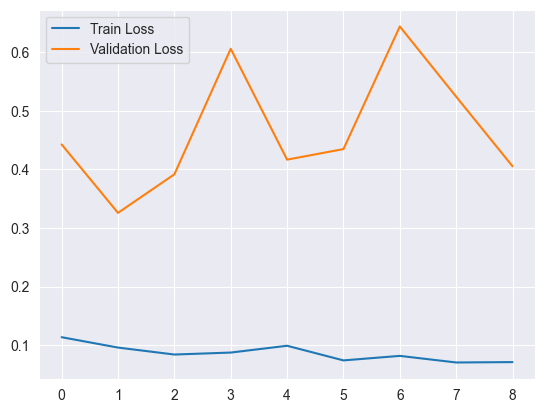

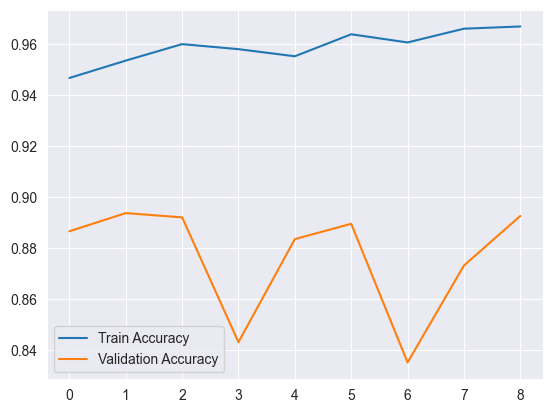

In [32]:
# Plot the loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

224/224 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.8914 - loss: 0.3261
Test Loss: 0.33317694067955017
Test Accuracy: 0.890954852104187


In [34]:
model.save("d_color-512merged-qwen.keras")